In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [21]:
from tensorflow.keras.layers import TextVectorization

In [25]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [26]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [30]:
MAX_WORDS = 200000

In [31]:
vectorizer = TextVectorization(max_tokens = MAX_WORDS,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [32]:
vectorizer.adapt(X.values) 

In [33]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [36]:
vectorized_text = vectorizer(X.values)

In [37]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

#### TensorFlow Data Pipeline using list_file, from_tensor_slices method
1. Map
2. Cache
3. Shuffle
4. batch
5. prefetch

In [39]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [41]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [42]:
batch_X.shape

(16, 1800)

In [43]:
batch_y.shape

(16, 6)

#### Train, validate, test on different partitioned data points

In [44]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [45]:
train_generator = train.as_numpy_iterator()

In [46]:
train_generator.next()

(array([[  150,  1527, 86715, ...,     0,     0,     0],
        [   21,   301,     3, ...,     0,     0,     0],
        [    8,   324,    54, ...,     0,     0,     0],
        ...,
        [  797,    48,   637, ...,     0,     0,     0],
        [    2,   379,    20, ...,     0,     0,     0],
        [   12,   132,   518, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

#### Embedding mapping what words are positive, negative

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [51]:
model = Sequential()
#embedding layer 
model.add(Embedding(MAX_WORDS+1, 32))
# GPU that is necessary for LSTM is tanh and implementing LSTM data training in birectional fashion
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final Layer
model.add(Dense(6, activation='sigmoid'))

In [52]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [100]:
history = model.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
6981/6981 [==============================] - 50412s 7s/step - loss: 0.0458 - val_loss: 0.0453
Epoch 2/10
6981/6981 [==============================] - 5451s 781ms/step - loss: 0.0409 - val_loss: 0.0361
Epoch 3/10
6981/6981 [==============================] - 8932s 1s/step - loss: 0.0361 - val_loss: 0.0327
Epoch 4/10
6981/6981 [==============================] - 15951s 2s/step - loss: 0.0330 - val_loss: 0.0286
Epoch 5/10
6981/6981 [==============================] - 5597s 802ms/step - loss: 0.0294 - val_loss: 0.0253
Epoch 6/10
5325/6981 [=====================>........] - ETA: 4:28:39 - loss: 0.0262

KeyboardInterrupt: 

In [101]:
history.history

{'loss': [0.06240612268447876], 'val_loss': [0.04715018346905708]}

In [102]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

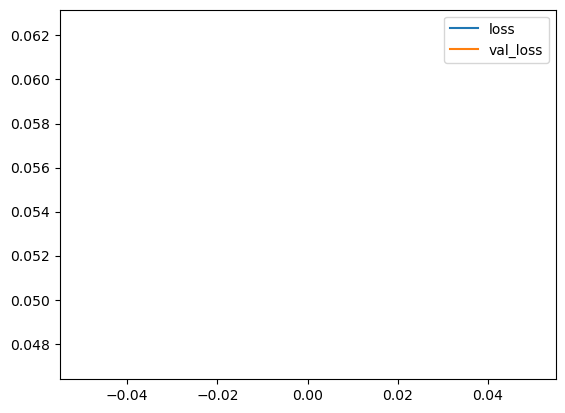

In [103]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [104]:
input_text = vectorizer('i want to meet you') 

In [105]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 224ms/step


array([[4.5682088e-01, 4.3842531e-04, 6.3052975e-02, 2.1444836e-03,
        7.4995674e-02, 3.0894673e-03]], dtype=float32)

In [106]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [107]:
batch = test.as_numpy_iterator().next()

In [108]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [109]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [110]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 301ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

#### Evaluating the model with the metrics Precision, Recall, CategoricalAccuracy

In [111]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [112]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [113]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 101ms/step


In [114]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8979233503341675, Recall:0.8362843990325928, Accuracy:0.48445335030555725
